In [1]:
!pip install pandas-datareader
!pip install yfinance

In [19]:
import numpy as np
import pandas as pd 
import requests
import matplotlib.pyplot as plt
import xlsxwriter
import math
from pandas_datareader import data as pdr
from datetime import datetime
import os
import yfinance as yf
yf.pdr_override()
import statsmodels
from statsmodels.tsa.stattools import coint

In [28]:
final_companies = pd.read_csv('final_stocks_data.csv')
final_companies_nd = final_companies.drop_duplicates(subset ="Symbl",
                     keep = 'first', inplace= False)
final_companies_nd.reset_index(inplace=True)
del final_companies_nd['index']
final_companies_nd

,Symbl
0,HINDALCO.NS
1,WIPRO.NS
2,JSWSTEEL.NS
3,NATIONALUM.NS
4,LTTS.NS
5,PIIND.NS
6,COFORGE.NS
7,TATAELXSI.NS
8,MPHASIS.NS
9,MINDTREE.NS


In [21]:
start = datetime(2018,11,5)
end = datetime(2022,2,1)

In [22]:
#This function returns a pd dataframe with all of the adjusted closing information
def get_historical_Data(tickers):
    data = pd.DataFrame()
    names = list()
    for i in tickers:
        data = pd.concat([data, pd.DataFrame(yf.download(i, start=start, end=end).iloc[:,4])], axis = 1)
        names.append(i)
    data.columns = names
    print(names)
    return data

ticks = final_companies_nd['Symbl'].tolist()
d = get_historical_Data(ticks)
print(d.shape)
d.tail()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

,HINDALCO.NS,WIPRO.NS,JSWSTEEL.NS,NATIONALUM.NS,LTTS.NS,PIIND.NS,COFORGE.NS,TATAELXSI.NS,MPHASIS.NS,MINDTREE.NS,...,VEDL.NS,TECHM.NS,LALPATHLAB.NS,SRF.NS,APOLLOHOSP.NS,SAIL.NS,AARTIIND.NS,ASTRAL.NS,INFY.NS,ATGL.NS
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-19,504.799988,620.140381,674.650024,109.199997,5066.408691,2692.800049,5408.250000,6977.250000,3088.250000,4226.200195,...,324.600006,1670.099976,3265.250000,2556.899902,4515.950195,104.650002,1072.300049,2391.350098,1867.050049,1794.900024
2022-01-20,503.399994,614.200012,682.500000,110.650002,5108.267090,2678.399902,5310.850098,7430.450195,3051.050049,4251.049805,...,327.149994,1666.900024,3189.399902,2567.750000,4644.799805,105.500000,1059.449951,2443.850098,1823.699951,1803.699951
2022-01-21,506.700012,605.049988,666.250000,108.250000,4799.845215,2593.550049,5200.350098,7200.700195,3024.600098,4118.850098,...,323.299988,1593.550049,3013.500000,2476.800049,4691.649902,102.550003,1019.950012,2376.949951,1785.699951,1827.300049
2022-01-24,478.399994,572.750000,621.799988,101.199997,4547.600098,2477.649902,4824.950195,7040.700195,2947.350098,3888.949951,...,312.100006,1513.150024,2871.050049,2369.699951,4498.149902,97.349998,982.400024,2172.300049,1736.800049,1781.150024
2022-01-25,485.750000,562.700012,631.150024,107.250000,4587.850098,2427.899902,4781.649902,7179.200195,3062.250000,3827.199951,...,318.049988,1500.599976,2964.800049,2470.500000,4486.000000,97.500000,981.799988,2112.199951,1722.150024,1825.199951


In [29]:
d

,HINDALCO.NS,WIPRO.NS,JSWSTEEL.NS,NATIONALUM.NS,LTTS.NS,PIIND.NS,COFORGE.NS,TATAELXSI.NS,MPHASIS.NS,MINDTREE.NS,...,VEDL.NS,TECHM.NS,LALPATHLAB.NS,SRF.NS,APOLLOHOSP.NS,SAIL.NS,AARTIIND.NS,ASTRAL.NS,INFY.NS,ATGL.NS
Date,,,,,,,,,,,,,,,,,,,,,
2018-11-05,237.827850,240.482925,329.214905,56.305817,1604.447876,797.763184,1164.830444,1006.724121,870.589966,755.219299,...,155.347763,631.155334,864.107910,393.031250,1155.196045,61.384621,326.630829,572.024841,610.962524,75.243607
2018-11-06,238.073196,241.076523,326.515259,55.670486,1601.219604,810.162659,1134.123535,991.492981,841.331421,766.935547,...,156.822235,629.523804,858.017517,396.071472,1118.294800,61.107700,333.814270,578.304016,611.375366,77.731827
2018-11-07,239.496140,241.410416,327.353088,56.107277,1629.022217,804.284058,1137.330078,999.723328,859.265564,768.773376,...,158.599152,631.971069,864.643799,395.380493,1122.609741,61.476933,334.592499,580.068054,619.677368,80.916748
2018-11-09,234.344086,241.039413,323.489838,55.829319,1603.917969,839.912170,1137.524414,973.045288,876.367615,785.038452,...,158.069870,640.989502,839.453857,410.916931,1139.572388,60.830780,331.982483,579.649475,604.999695,79.573105
2018-11-12,224.972290,239.926422,320.743683,55.273411,1598.424927,818.604675,1158.562744,942.488281,897.259949,793.400757,...,153.608658,656.715088,819.428650,401.243683,1127.619263,60.646160,331.168396,570.410217,609.311218,75.641724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-19,504.799988,620.140381,674.650024,109.199997,5066.408691,2692.800049,5408.250000,6977.250000,3088.250000,4226.200195,...,324.600006,1670.099976,3265.250000,2556.899902,4515.950195,104.650002,1072.300049,2391.350098,1867.050049,1794.900024
2022-01-20,503.399994,614.200012,682.500000,110.650002,5108.267090,2678.399902,5310.850098,7430.450195,3051.050049,4251.049805,...,327.149994,1666.900024,3189.399902,2567.750000,4644.799805,105.500000,1059.449951,2443.850098,1823.699951,1803.699951
2022-01-21,506.700012,605.049988,666.250000,108.250000,4799.845215,2593.550049,5200.350098,7200.700195,3024.600098,4118.850098,...,323.299988,1593.550049,3013.500000,2476.800049,4691.649902,102.550003,1019.950012,2376.949951,1785.699951,1827.300049


In [32]:
def find_cointegrated_pairs(data):
    n = data.shape[1]
    score_matrix = np.zeros((n, n))
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            S1 = data[keys[i]]
            S2 = data[keys[j]]
            result = coint(S1, S2)
            score = result[0]
            pvalue = result[1]
            score_matrix[i, j] = score
            pvalue_matrix[i, j] = pvalue
            if pvalue < 0.05:
                pairs.append((keys[i], keys[j]))
    return score_matrix, pvalue_matrix, pairs

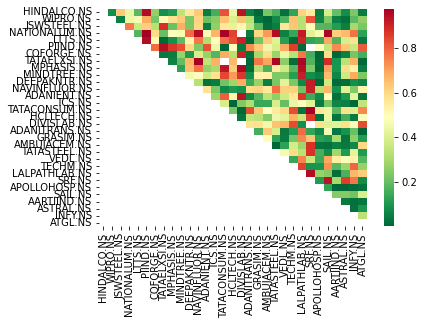

[('HINDALCO.NS', 'ADANIENT.NS'), ('HINDALCO.NS', 'GRASIM.NS'), ('HINDALCO.NS', 'VEDL.NS'), ('HINDALCO.NS', 'APOLLOHOSP.NS'), ('HINDALCO.NS', 'ATGL.NS'), ('WIPRO.NS', 'JSWSTEEL.NS'), ('WIPRO.NS', 'GRASIM.NS'), ('WIPRO.NS', 'AMBUJACEM.NS'), ('WIPRO.NS', 'AARTIIND.NS'), ('WIPRO.NS', 'ASTRAL.NS'), ('JSWSTEEL.NS', 'ADANIENT.NS'), ('JSWSTEEL.NS', 'AMBUJACEM.NS'), ('JSWSTEEL.NS', 'TATASTEEL.NS'), ('JSWSTEEL.NS', 'ASTRAL.NS'), ('NATIONALUM.NS', 'ADANITRANS.NS'), ('LTTS.NS', 'TATAELXSI.NS'), ('LTTS.NS', 'ADANITRANS.NS'), ('LTTS.NS', 'TECHM.NS'), ('LTTS.NS', 'ATGL.NS'), ('PIIND.NS', 'TATACONSUM.NS'), ('PIIND.NS', 'DIVISLAB.NS'), ('PIIND.NS', 'LALPATHLAB.NS'), ('COFORGE.NS', 'TATAELXSI.NS'), ('COFORGE.NS', 'MPHASIS.NS'), ('COFORGE.NS', 'ADANITRANS.NS'), ('COFORGE.NS', 'APOLLOHOSP.NS'), ('COFORGE.NS', 'AARTIIND.NS'), ('COFORGE.NS', 'ASTRAL.NS'), ('TATAELXSI.NS', 'ADANITRANS.NS'), ('TATAELXSI.NS', 'TECHM.NS'), ('TATAELXSI.NS', 'APOLLOHOSP.NS'), ('TATAELXSI.NS', 'ATGL.NS'), ('MPHASIS.NS', 'ADANITRAN

In [35]:
# Heatmap to show the p-values of the cointegration test
# between each pair of stocks

scores, pvalues, pairs = find_cointegrated_pairs(d)
import seaborn

names = final_companies_nd['Symbl'].tolist()
m = np.arange(0, 1, 0.05).tolist()
seaborn.heatmap(pvalues, xticklabels=names, 
                yticklabels=names, cmap='RdYlGn_r' 
                , mask = (pvalues >= 0.98))
plt.show()
print(pairs)
print(len(pairs))